We develop analyses for circuit composition. 
In another notebook we have composed analyses using components provided in out analysis
framework **DMT**, However, *composing* an analyses is restricted by the availability of 
components that are assembled to define an analysis. A freer approach is to base an analysis
on a base analysis-class and override its methods. Here we use this *inheriting* approach
to build some customized circuit composition analyses.

In [12]:
import os
import neuro_dmt

os.environ["DMTPATH"] =\
    os.path.join(
        os.environ["HOME"],
        "work/bbp/work/validations/dmt")

neuro_dmt.data.LOCATION = os.path.join(
    os.environ["DMTPATH"],
    "examples/datasets")

In [23]:
import numpy as np
import pandas as pd
from dmt.model.interface import Interface
from dmt.tk.plotting import Bars
from neuro_dmt.data import rat
from neuro_dmt.analysis.circuit import BrainCircuitAnalysis
from neuro_dmt.models.bluebrain.circuit.model import BlueBrainCircuitModel
from neuro_dmt.models.bluebrain.circuit.adapter import BlueBrainCircuitAdapter
from neuro_dmt import terminology

class CellDensityAnalysis:
    """
    Analyze the cell density in a circuit.
    """
    
    class AdapterInterface(Interface):
        """
        Define the methods required to run this analysis,
        which must be provided by an adapter of the circuit model to be analyzed.
        """
        def get_label(self, circuit_model):
            """
            Get a label for the circuit_model
            """
            raise NotImplementedError
            
        def get_cell_density(self, 
                circuit_model,
                layer):
            """
            Get cell density for the circuit model for the given layer.
            """
            raise NotImplementedError
            
            
    def __call__(self, circuit_model, adapter):
        """
        Run the analysis.
        """
        adapter = self.AdapterInterface.implementation(adapter)
        layers = ["L1", "L2", "L3", "L4", "L5", "L6"]
        model_measurement = pd.DataFrame({
            "cell_density": [
                adapter.get_cell_density(
                    circuit_model,
                    layer=layer) 
                for layer in layers],
            "layer": layers}
        ).set_index(
            "layer"
        )
        reference_data = {
        }
        plotter = Bars(
            xvar="layer",
            xlabel="Layer",
            yvar="cell_density",
            ylabel="Cell Density",
            gvar="dataset")
        return plotter.get_figure({
            adapter.get_label(circuit_model): model_measurement,
            "DeFelipe2017": rat.defelipe2017.summary_measurement.samples(1000),
            "DeFelipe2014": rat.defelipe2014.summary_measurement.samples(1000),
            "meyer2010": rat.meyer2010.samples(1000)
        })

In [3]:
from neuro_dmt.models.bluebrain.circuit.mock.test.mock_circuit_light import\
    circuit_composition,\
    circuit_connectivity
from neuro_dmt.models.bluebrain.circuit.mock.circuit\
    import MockBlueBrainCircuitModel
mock_circuit_model = MockBlueBrainCircuitModel(
    circuit_composition,
    circuit_connectivity)

In [24]:
adapter = BlueBrainCircuitAdapter()

cell_density_analysis = CellDensityAnalysis()

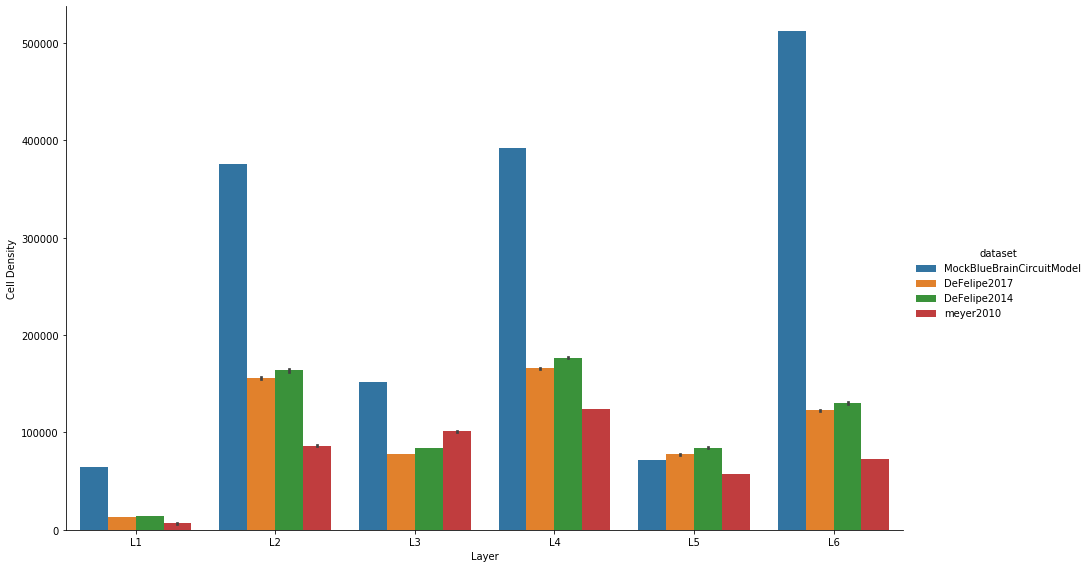

In [25]:
cell_density_analysis(mock_circuit_model, adapter)

In [21]:
layers = ["L1", "L2", "L3", "L4", "L5", "L6"]
pd.DataFrame(
    {"cell_density": [
        adapter.get_cell_density(
            mock_circuit_model,
            layer=layer) 
        for layer in layers]},
        index = layers
    )

,cell_density
L1,64000.0
L2,256000.0
L3,24000.0
L4,32000.0
L5,264000.0
L6,400000.0
